Design 4 chips for 4 different Lk (12, 24, 232, 61)pH/sq

In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

# Kinetic inductances definitions

In [3]:
Lk_12 = 12e-12 # For SiTUD20
Lk_24 = 24e-12 # For SiSC10
Lk_61 = 61e-12 # For GeHarry8
Lk_232 = 232e-12 # For SiChip5
epsilon_r_Si = 11.9
epsilon_r_Ge = [15.18, 16, 15.18, 16, 11.9]
thickness_subs_Si = 500e-6
thickness_subs_Ge = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]


# CPW parameters

In [20]:
# 12pH/sq thicker --> resonance outsde of the band
FeedlineWidth12 = 80
FeedlineLength12  = 6200
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200/6

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
# print('Impedance of the bondpad is', impedance_CPW(BondpadWidth12*1e-6, BondpadGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 49.63979337993569 Ohm
Frequency of the feedline is 6.426137709476485 GHz


In [4]:
# 12pH/sq
FeedlineWidth12 = 30
FeedlineLength12  = 6200
FeedlineGap12 = 5
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200/6

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth12*1e-6, BondpadGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.0421104007295 Ohm
Impedance of the bondpad is 35.81450993269701 Ohm
Frequency of the feedline is 5.542020901728536 GHz


In [6]:
# 24pH/sq
FeedlineWidth24 = 50.1
FeedlineLength24  = 5700
FeedlineGap24 = 5
FeedlineTaperLength24 =  100
BondpadWidth24 =  230
BondpadLength24 = 200
BondpadGap24 = 185

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth24*1e-6, BondpadGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24, length_CPW=(FeedlineLength24 + FeedlineTaperLength24 + BondpadLength24)*1e-6)/1e9, 'GHz')


Impedance of the feedline is 50.06035358042184 Ohm
Impedance of the bondpad is 50.0888166242714 Ohm
Frequency of the feedline is 5.682366513696933 GHz


In [7]:
# 61pH/sq on Ge!!
FeedlineWidth61 = 87
FeedlineLength61  = 5700
FeedlineGap61 = 5
FeedlineTaperLength61 =  100
BondpadWidth61 =  184
BondpadLength61 = 100
BondpadGap61 = 100

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth61*1e-6, FeedlineGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth61*1e-6, BondpadGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth61*1e-6, FeedlineGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61, length_CPW=(FeedlineLength61 + FeedlineTaperLength61 + BondpadLength61)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.08723025799379 Ohm
Impedance of the bondpad is 50.05660330252604 Ohm
Frequency of the feedline is 4.600296503147544 GHz


In [8]:
# 232pH/sq
FeedlineWidth232 = 330
FeedlineLength232  = 5700
FeedlineGap232 = 5
FeedlineTaperLength232 =  100
BondpadWidth232 =  450
BondpadLength232 = 100
BondpadGap232 = 50

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth232*1e-6, BondpadGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232, length_CPW=(FeedlineLength232 + FeedlineTaperLength232 + BondpadLength232)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.09872776388761 Ohm
Impedance of the bondpad is 52.172154091646235 Ohm
Frequency of the feedline is 4.880979474744977 GHz


# Resonators list

Inductor total length is [ 630.  870.  790.  870.  950.  870. 1110.  870. 1270.  870. 1430.  870.]
Resonator 1
 Lg: 13.229763285979159 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 2
 Lg: 18.26890444121036 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 3
 Lg: 16.58919072279996 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 4
 Lg: 18.26890444121036 nH
 Cg: 37.89856914206288 fF
 Cc: 0.23550122211569277 fF
Resonator 5
 Lg: 19.948618159620757 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 6
 Lg: 18.26890444121036 nH
 Cg: 37.89856914206288 fF
 Cc: 0.21974756639967397 fF
Resonator 7
 Lg: 23.308045596441556 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 8
 Lg: 18.26890444121036 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 9
 Lg: 26.667473033262354 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 10
 Lg: 18.26890444121036 nH
 Cg: 37.89856914206288 fF
 Cc:

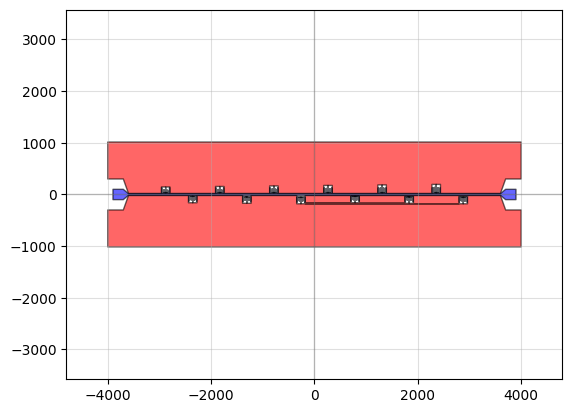

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-12Res-12pHsq.gds'

In [52]:
# 12pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 12

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[7,10,9,10,11,10,13,10,15,10, 17, 10]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*75
InductorEndLength12 = 50*np.ones(NumberOfResonators12)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10,10,10,20,10,30,10,5,10,10,10,20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    # print(f' Impedance: {impedance_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
    #                                         CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6, 
    #                                         InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
    #                                     epsilon_r_Si, thickness_subs_Si)} Ohm')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        
    # print(f' Frequency: {resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
    #                                         CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6, 
    #                                         InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
    #                                     epsilon_r_Si, thickness_subs_Si)/1e9} GHz')
    # print('')

print('The frequencies are', freqs)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, np.max(InductorTotalLength12) + 20*FeedlineWidth12]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-12Res-12pHsq.gds")


Inductor total length is [ 590.  655.  720.  790.  870.  950. 1060. 1190. 1280. 1370. 1475. 1580.]
Resonator 1
 Lg: 12.389906426773958 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 2
 Lg: 13.754673822982411 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 3
 Lg: 15.119441219190858 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 4
 Lg: 16.58919072279996 nH
 Cg: 37.89856914206288 fF
 Cc: 0.23550122211569277 fF
Resonator 5
 Lg: 18.26890444121036 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 6
 Lg: 19.948618159620757 nH
 Cg: 37.89856914206288 fF
 Cc: 0.21974756639967397 fF
Resonator 7
 Lg: 22.258224522435057 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 8
 Lg: 24.987759314851953 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 9
 Lg: 26.877437248063657 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 10
 Lg: 28.767115181275358 nH
 Cg: 37.89856914206288 fF


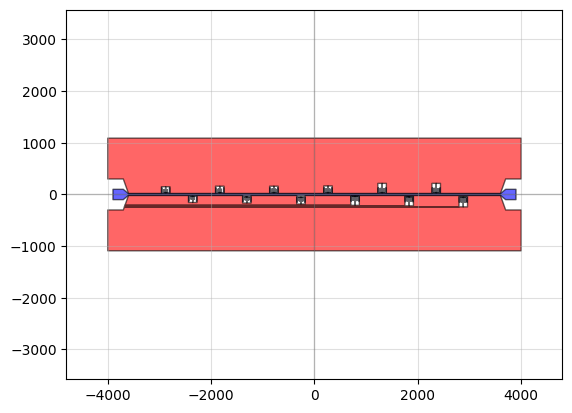

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-12Res-12pHsq_v2.gds'

In [20]:
# 12pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 12

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[8, 9, 10, 9, 10, 11, 11, 12, 13, 12, 13, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[60, 60, 60, 75, 75, 75, 85, 85, 85, 100, 100, 100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([50]*7 + [90]*5)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10,10,10,20,10,30,10,5,10,10,10,20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    # print(f' Impedance: {impedance_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
    #                                         CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6, 
    #                                         InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
    #                                     epsilon_r_Si, thickness_subs_Si)} Ohm')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        
    # print(f' Frequency: {resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
    #                                         CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6, 
    #                                         InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
    #                                     epsilon_r_Si, thickness_subs_Si)/1e9} GHz')
    # print('')

print('The frequencies are', freqs)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, np.max(InductorTotalLength12) + 20*FeedlineWidth12]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-12Res-12pHsq_v2.gds")


Single resonators for last and first resonators (lowest and highest frequency)

Inductor total length is [1580.]
Resonator 1
 Lg: 33.17636369210266 nH
 Cg: 37.89856914206288 fF
 Cc: 0.21974756639967397 fF
The frequencies are [4.4754723974100035]


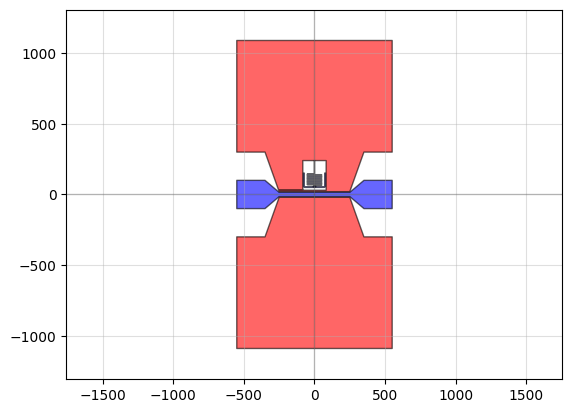

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240511-FirstRes-12pHsq_v2.gds'

In [24]:
# 12pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator12 = [10]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([90])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        
print('The frequencies are', freqs)
FeedlineWidth12 = 30
FeedlineLength12  = 500
FeedlineGap12 = 5
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, np.max(InductorTotalLength12) + 20*FeedlineWidth12]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240511-FirstRes-12pHsq_v2.gds")


First resonator with higher frequency (v3)

Inductor total length is [435.]
Resonator 1
 Lg: 9.135461097353812 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
The frequencies are [8.524072584481166]


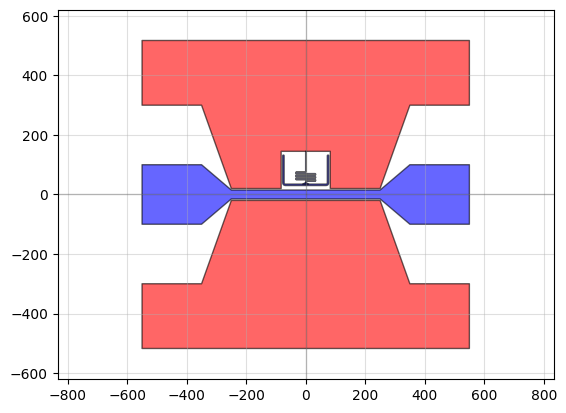

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240511-FirstRes-12pHsq_v4.gds'

In [41]:
# 12pH/sq first resonator. Making the resonator shorter to increase the frequency
SeparationTlineResonator12 = [0]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)
FeedlineWidth12 = 30
FeedlineLength12  = 500
FeedlineGap12 = 5
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, np.max(InductorTotalLength12) + 20*FeedlineWidth12]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-FirstRes-12pHsq_v4.gds")


Inductor total length is [1580.]
Resonator 1
 Lg: 33.17636369210266 nH
 Cg: 37.89856914206288 fF
 Cc: 0.21974756639967397 fF
The frequencies are [4.4754723974100035]


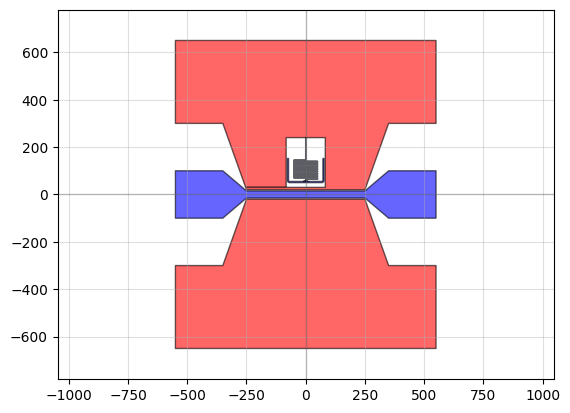

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240511-LastRes-12pHsq_v2.gds'

In [23]:
# Last resonator 12pH/sq, lowest frequency
SeparationTlineResonator12 = [10]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([90])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        


print('The frequencies are', freqs)
FeedlineWidth12 = 30
FeedlineLength12  = 500
FeedlineGap12 = 5
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-LastRes-12pHsq_v2.gds")


### v3 with larger frequency span (Fab version: rename)



Resonator 1
 Lg: 9.135461097353812 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 2
 Lg: 10.017310799519272 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 3
 Lg: 11.02513903056551 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 4
 Lg: 12.032967261611748 nH
 Cg: 37.89856914206288 fF
 Cc: 0.23550122211569277 fF
Resonator 5
 Lg: 13.229763285979159 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 6
 Lg: 14.909477004389561 nH
 Cg: 37.89856914206288 fF
 Cc: 0.21974756639967397 fF
Resonator 7
 Lg: 16.58919072279996 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 8
 Lg: 18.75182213525335 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20435090905093617 fF
Resonator 9
 Lg: 21.20840344842856 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26205878946577893 fF
Resonator 10
 Lg: 24.25288456304741 nH
 Cg: 37.89856914206288 fF
 Cc: 0.24668362928724064 fF
Resonator 11
 Lg: 28.767115181275358 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26

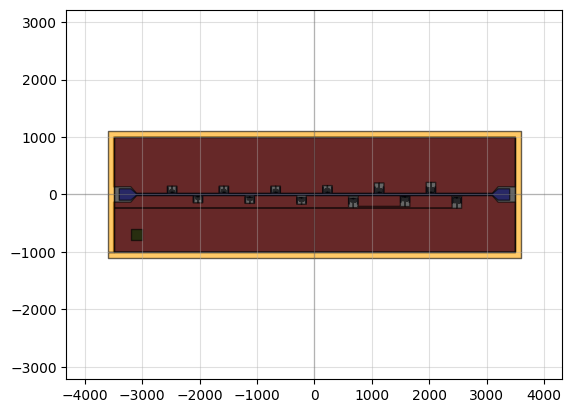

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240514-SiRes-12pHsq-v1-bondpad_fix.gds'

In [5]:
# We take as reference the first (v3) and last resonator (v2) and put resonators in between
# Fabrication version: We call it v0

# 12pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 12

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5, 6, 7, 6, 7, 8, 9, 9, 10, 11, 12, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66, 62, 60, 78, 75, 75, 75, 82, 85, 90, 100, 100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60] + [55,50,55] + [50]*3 + [90]*5)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10,10,10,20,10,30,10,40,10,5,10,20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240514-SiRes-12pHsq-v1-bondpad_fix.gds")


# SiRes v1 thicker feedline

Test First and last resonator


Inductor total length is [1580.]
Resonator 1
 Lg: 33.17636369210266 nH
 Cg: 37.89856914206288 fF
 Cc: 0.1979018818407487 fF
The frequencies are [4.476755400055545]


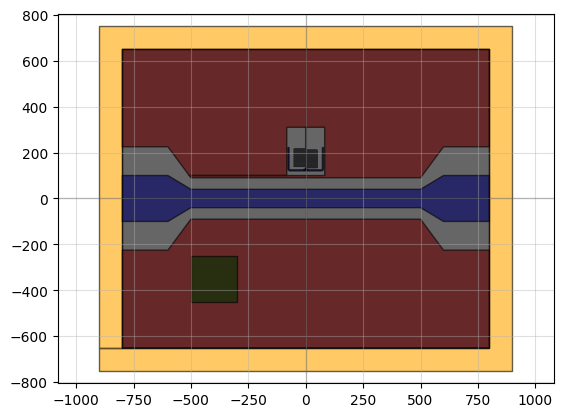

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-SiRes-LastRes-12pHsq_v1.gds'

In [24]:
# Last resonator 12pH/sq, lowest frequency
SeparationTlineResonator12 = [10]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([90])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        


print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80

ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-SiRes-LastRes-12pHsq_v1.gds")


Inductor total length is [435.]
Resonator 1
 Lg: 9.135461097353812 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
The frequencies are [8.52997635913335]


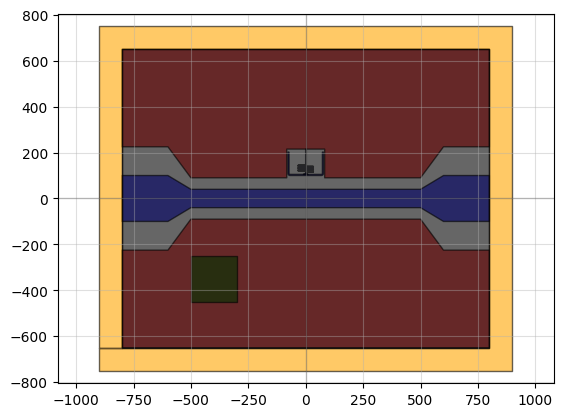

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-SiRes-FirstRes-12pHsq_v1.gds'

In [26]:
# 12pH/sq first resonator. Making the resonator shorter to increase the frequency
SeparationTlineResonator12 = [0]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-SiRes-FirstRes-12pHsq_v1.gds")


Resonator 1
 Lg: 9.135461097353812 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 2
 Lg: 10.017310799519272 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 3
 Lg: 11.02513903056551 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 4
 Lg: 12.032967261611748 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20312982663676243 fF
Resonator 5
 Lg: 13.229763285979159 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 6
 Lg: 14.909477004389561 nH
 Cg: 37.89856914206288 fF
 Cc: 0.1979018818407487 fF
Resonator 7
 Lg: 16.58919072279996 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 8
 Lg: 18.75182213525335 nH
 Cg: 37.89856914206288 fF
 Cc: 0.19125256049954506 fF
Resonator 9
 Lg: 21.20840344842856 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 10
 Lg: 24.25288456304741 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20606071606065215 fF
Resonator 11
 Lg: 28.767115181275358 nH
 Cg: 37.89856914206288 fF
 Cc: 0.209

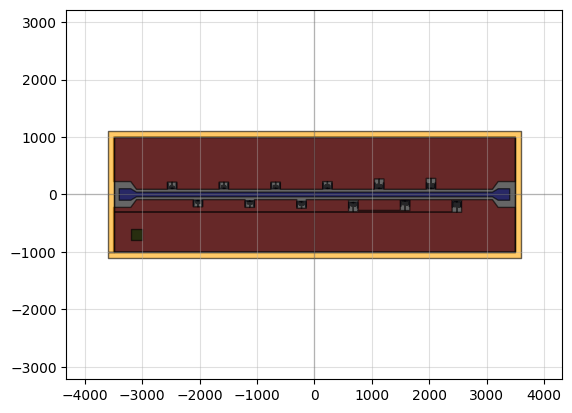

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240514-SiRes-12pHsq-v1.gds'

In [28]:
# We take as reference the first (v3) and last resonator (v2) and put resonators in between
# Fabrication version: We call it v0

# 12pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 12

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5, 6, 7, 6, 7, 8, 9, 9, 10, 11, 12, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66, 62, 60, 78, 75, 75, 75, 82, 85, 90, 100, 100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60] + [55,50,55] + [50]*3 + [90]*5)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10,10,10,20,10,30,10,40,10,5,10,20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 6200
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240514-SiRes-12pHsq-v1.gds")


Inductor total length is [115. 145. 130. 145. 160. 145. 190. 145. 220. 145. 250. 145.]
Resonator 1
 Lg: 44.58327289037888 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 2
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 3
 Lg: 50.39821921258083 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 4
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.2525404356655893 fF
Resonator 5
 Lg: 62.02811185698472 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 6
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.23817898982213045 fF
Resonator 7
 Lg: 73.65800450138863 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 8
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 9
 Lg: 85.28789714579253 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 10
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.2525

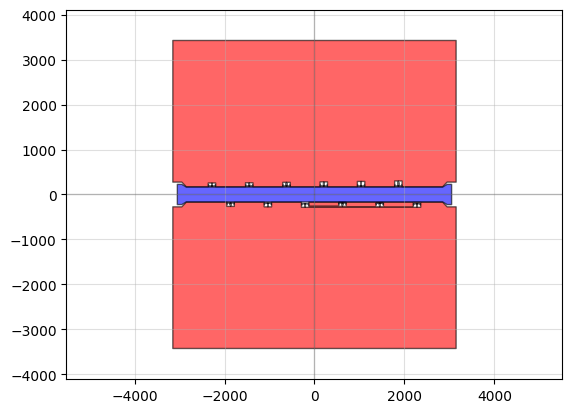

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-12Res-232pHsq.gds'

In [61]:
# 232pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator232 = [0]*7 + [5,0,10,0,10]
NumberOfResonators232 = 12

#Resonator parameters
CapacitorHorizontalLength232 = np.ones(NumberOfResonators232)*150
CapacitorVerticalLength232 = np.ones(NumberOfResonators232)*30
CapacitorWidth232 = np.ones(NumberOfResonators232)*5

NumberOfBends232 = np.ones(NumberOfResonators232, dtype=int)*[8,10,9,10,11,10,13,10,15,10, 17, 10]-np.ones(NumberOfResonators232, dtype=int)*3
InductorVerticalLength232 = np.ones(NumberOfResonators232)*5
InductorHorizontalLength232 = np.ones(NumberOfResonators232)*10
InductorEndLength232 = 20*np.ones(NumberOfResonators232)
InductorTotalLength232 = InductorVerticalLength232*(NumberOfBends232+4) + InductorEndLength232 +InductorHorizontalLength232*NumberOfBends232
print('Inductor total length is', InductorTotalLength232)
InductorWidth232 = np.ones(NumberOfResonators232)*0.6
TaperWidth232 = np.ones(NumberOfResonators232)*20

SpacingC0232 = np.ones(NumberOfResonators232)*5
SpacingCc232 = np.ones(NumberOfResonators232)*[10,10,10,20,10,30,10,5,10,10,10,20]
TaperLength232 = np.ones(NumberOfResonators232)*5
FinalSpacingBondpads232 = 100

freqs = []

for i in range(NumberOfResonators232):
    print(f'Resonator {i+1}')
    # print(f' Impedance: {impedance_Schuster(InductorWidth232[i]*1e-6, CapacitorWidth232[i]*1e-6, (SeparationTlineResonator232[i] + FeedlineGap232 + SpacingCc232[i])*1e-6 , FeedlineWidth232*1e-6,
    #                                         CapacitorVerticalLength232[i]*1e-6, SpacingC0232[i]*1e-6, 
    #                                         InductorWidth232[i]*1e-6, InductorTotalLength232[i]*1e-6, Lk_232,
    #                                     epsilon_r_Si, thickness_subs_Si)} Ohm')
    freqs.append(resonance_freq_Schuster(InductorWidth232[i]*1e-6, CapacitorWidth232[i]*1e-6, (SeparationTlineResonator232[i] + FeedlineGap232 + SpacingCc232[i])*1e-6 , FeedlineWidth232*1e-6,
                                            CapacitorVerticalLength232[i]*1e-6, SpacingC0232[i]*1e-6,
                                            InductorWidth232[i]*1e-6, InductorTotalLength232[i]*1e-6, Lk_232,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        
    # print(f' Frequency: {resonance_freq_Schuster(InductorWidth232[i]*1e-6, CapacitorWidth232[i]*1e-6, (SeparationTlineResonator232[i] + FeedlineGap232 + SpacingCc232[i])*1e-6 , FeedlineWidth232*1e-6,
    #                                         CapacitorVerticalLength232[i]*1e-6, SpacingC0232[i]*1e-6, 
    #                                         InductorWidth232[i]*1e-6, InductorTotalLength232[i]*1e-6, Lk_232,
    #                                     epsilon_r_Si, thickness_subs_Si)/1e9} GHz')
    # print('')

print('The frequencies are', freqs)

ChipSize232 = [FeedlineLength232 + 2*BondpadLength232 + 2*FeedlineTaperLength232 + 2*FinalSpacingBondpads232, np.max(InductorTotalLength232) + 20*FeedlineWidth232]

c, metal, chip232 = ChipResonatorsTline(ChipSize232, NumberOfResonators232, SeparationTlineResonator232,
                        FeedlineWidth232, FeedlineLength232, FeedlineGap232, 
                        FeedlineTaperLength232, BondpadWidth232, BondpadLength232, BondpadGap232,
                        CapacitorHorizontalLength232, CapacitorVerticalLength232, CapacitorWidth232,
                        NumberOfBends232, InductorVerticalLength232, InductorHorizontalLength232, InductorWidth232, InductorEndLength232,
                        TaperWidth232, TaperLength232, SpacingC0232, SpacingCc232,
                        FinalSpacingBondpads232)

qp(chip232)
chip232.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-12Res-232pHsq.gds")
